# Nettoyage et analyse de la base de données " Bank Marketing"

#### Importation des Bibliothèques necessaires 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
import os 

In [2]:
data="bank.csv" 
#data frame nommé df a partir du fichier data 
df=pd.read_csv(data) #la lecture du fichier text

In [3]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


## Commençons par Comprendre notre base de donnees 

In [4]:
df.shape

(11162, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


##### Observation : Notre ensemble de données ne contient aucune valeur nulle/nan/manquante.

#### les colonnes de notre base de donnees sont :
Age: L'âge du client 

Job: Le type d'emploi du client (admin, technician, services, etc.). 

Marital: L'état civil du client (married, single, divorced). 

Education: Le niveau d'éducation du client (primary, secondary, tertiary). 

Default: Indique si le client a un crédit par défaut (yes/no).

Balance: Solde du compte du client.

Housing: Indique si le client a un prêt immobilier (yes/no).

Loan: Indique si le client a un prêt personnel (yes/no).

Contact: Le type de communication établi avec le client (unknown, cellular, telephone).

Day: Le jour du mois où le dernier contact a été effectué.

Month: Le mois où le dernier contact a été effectué.

Duration: La durée du dernier contact en secondes.

Campaign: Nombre de contacts effectués lors de cette campagne.

Pdays: Nombre de jours depuis le dernier contact (-1 si ce n'est pas applicable).

Previous: Nombre de contacts effectués avant cette campagne. 

Poutcome: Résultat de la campagne marketing précédente (unknown, other, failure, success).

Deposit: Indique si le client a effectué un dépôt (yes/no).

In [6]:
val_manquantes=df[df.isnull().any(axis=1)]
val_manquantes

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit


In [7]:
val_manquantes.isnull().all()

age          True
job          True
marital      True
education    True
default      True
balance      True
housing      True
loan         True
contact      True
day          True
month        True
duration     True
campaign     True
pdays        True
previous     True
poutcome     True
deposit      True
dtype: bool

In [8]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


Selon cette base de données liée au marketing bancaire, la colonne "Deposit" semble indiquer si un client a effectué un dépôt d'argent à la suite d'une campagne marketing ou d'une interaction particulière avec la banque. Elle pourrait avoir des valeurs comme "yes" (oui) ou "no" (non), indiquant si le client a pris cette décision spécifique.

# Analyse des données 

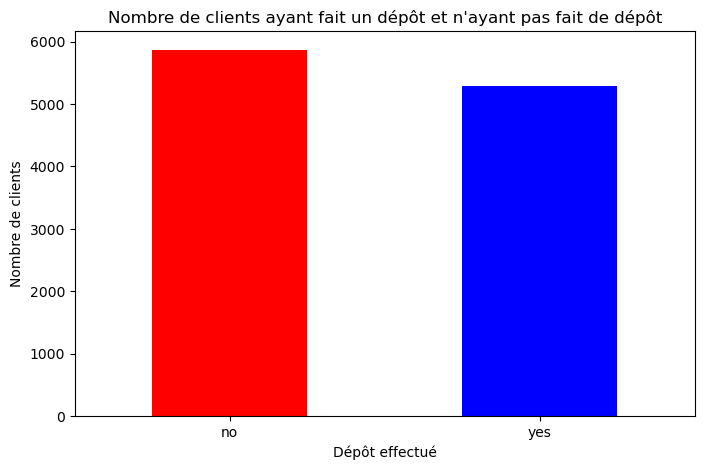

In [9]:
# Compter le nombre de personnes ayant fait un dépôt et le nombre de personnes n'ayant pas fait de dépôt
deposit_counts = df['deposit'].value_counts()
plt.figure(figsize=(8, 5))
deposit_counts.plot(kind='bar', color=['red', 'blue'])
plt.xlabel('Dépôt effectué')
plt.ylabel('Nombre de clients')
plt.title('Nombre de clients ayant fait un dépôt et n\'ayant pas fait de dépôt')
plt.xticks(rotation=0)
plt.show()

## "On va étudier les caractéristiques remarquables des personnes qui ont effectué un dépôt."   
## Hypothèse 1 : Les personnes plus jeunes sont plus enclines à effectuer un dépôt en raison de leur familiarité avec les services bancaires en ligne. 


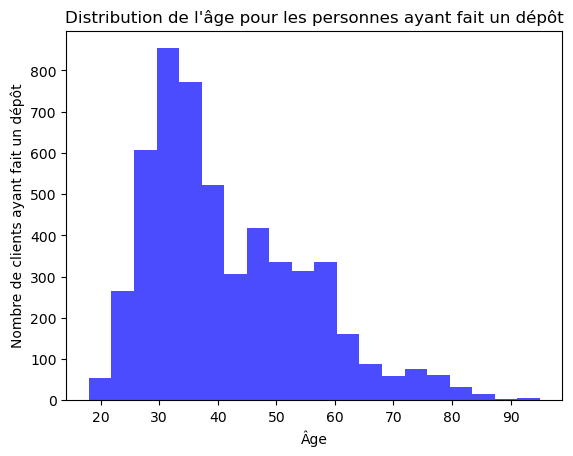

In [10]:
# Sélectionner uniquement les personnes ayant fait un dépôt
deposit_data = df[df['deposit'] == 'yes']

# Créer un histogramme pour les âges des personnes ayant fait un dépôt
plt.hist(deposit_data['age'], bins=20, color='blue', alpha=0.7)
plt.xlabel('Âge')
plt.ylabel('Nombre de clients ayant fait un dépôt')
plt.title('Distribution de l\'âge pour les personnes ayant fait un dépôt')
plt.show()

In [11]:
# Calculer des statistiques descriptives pour l'âge des personnes ayant fait un dépôt
age_stats_deposit = deposit_data['age'].describe()

# Afficher les statistiques
print("Statistiques descriptives pour l'âge des personnes ayant fait un dépôt :")
print(age_stats_deposit)

Statistiques descriptives pour l'âge des personnes ayant fait un dépôt :
count    5289.000000
mean       41.670070
std        13.497781
min        18.000000
25%        31.000000
50%        38.000000
75%        50.000000
max        95.000000
Name: age, dtype: float64


count: Il y a un total de 5289 personnes dans ce groupe.

mean: L'âge moyen des personnes ayant effectué un dépôt est d'environ 41.67 ans.

std: L'écart-type de l'âge est d'environ 13.5 ans, indiquant la dispersion des âges autour de la moyenne.

min: L'âge minimum est de 18 ans.

25% (1er quartile), 50% (médiane), 75% (3e quartile): Ces valeurs montrent la distribution des âges. Par exemple, 25% des personnes ont un âge inférieur à 31 ans, 50% ont un âge inférieur à 38 ans, et 75% ont un âge inférieur à 50 ans.

max: L'âge maximum est de 95 ans.

## Hypothèse 2 : Les personnes ayant des soldes de compte plus élevés sont plus susceptibles de faire un dépôt, car elles ont probablement une capacité financière plus importante.

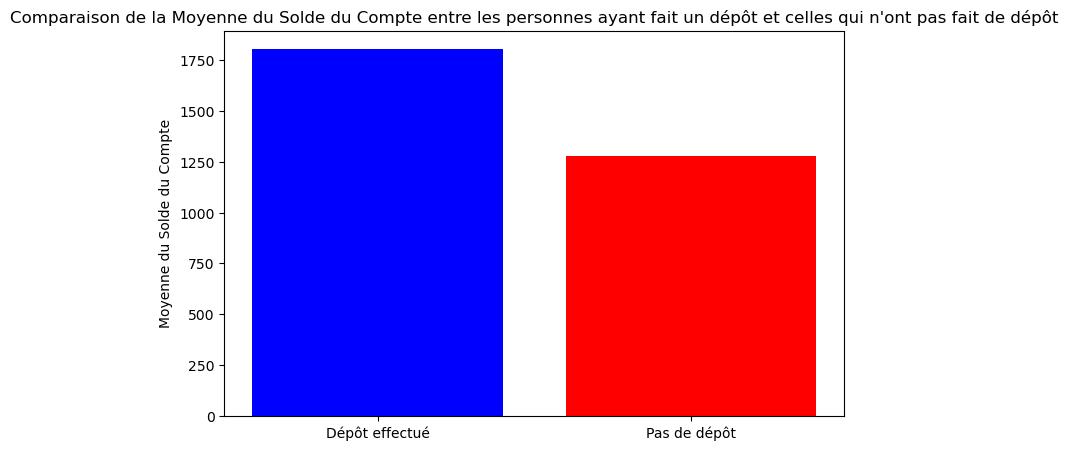

In [12]:
# Calculer la moyenne du solde du compte pour les personnes ayant fait un dépôt et celles qui n'ont pas fait de dépôt
mean_balance_deposit = df[df['deposit'] == 'yes']['balance'].mean()
mean_balance_no_deposit = df[df['deposit'] == 'no']['balance'].mean()

# Créer un diagramme à barres pour comparer la moyenne du solde du compte
plt.figure(figsize=(8, 5))
bars = plt.bar(['Dépôt effectué', 'Pas de dépôt'], [mean_balance_deposit, mean_balance_no_deposit], color=['blue', 'red'])
plt.ylabel('Moyenne du Solde du Compte')
plt.title('Comparaison de la Moyenne du Solde du Compte entre les personnes ayant fait un dépôt et celles qui n\'ont pas fait de dépôt')

# Stocker les moyennes dans des variables pour une utilisation ultérieure
mean_balance_deposit_value = mean_balance_deposit
mean_balance_no_deposit_value = mean_balance_no_deposit

plt.show()

In [13]:
print(mean_balance_deposit_value) 
print(mean_balance_no_deposit_value)

1804.2679145396105
1280.2271411544355


 ### Conclusion : La moyenne du solde du compte pour les personnes ayant effectué un dépôt est effectivement plus élevée que celle des personnes n'ayant pas fait de dépôt.  
 ### Il est important de noter que cela ne garantit pas que chaque individu avec un solde élevé fera un dépôt.

## Hypothèse 3 : Les personnes ayant une durée de dernier contact plus longue sont plus susceptibles de faire un dépôt,car cela peut indiquer un intérêt accru et une interaction plus engagée. 

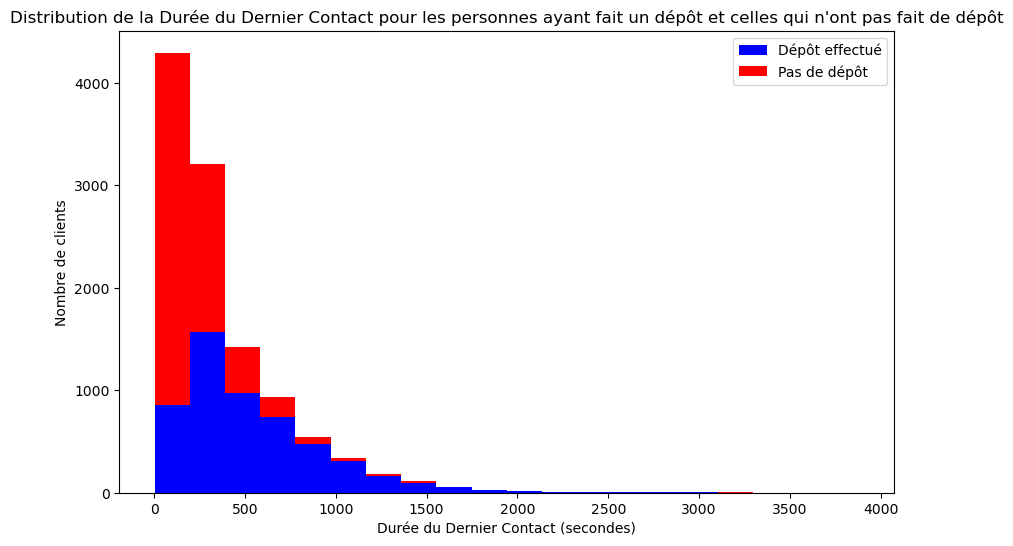

In [14]:
# Sélectionner les données pour les personnes ayant fait un dépôt et celles qui n'ont pas fait de dépôt
deposit_data = df[df['deposit'] == 'yes']
no_deposit_data = df[df['deposit'] == 'no']

# Créer un graphique en barres empilées pour comparer la durée du dernier contact
plt.figure(figsize=(10, 6))
plt.hist([deposit_data['duration'], no_deposit_data['duration']], bins=20, stacked=True, label=['Dépôt effectué', 'Pas de dépôt'], color=['blue', 'red'])
plt.xlabel('Durée du Dernier Contact (secondes)')
plt.ylabel('Nombre de clients')
plt.title('Distribution de la Durée du Dernier Contact pour les personnes ayant fait un dépôt et celles qui n\'ont pas fait de dépôt')
plt.legend()
plt.show()

In [15]:
# Sélectionner les données pour les personnes ayant fait un dépôt et celles qui n'ont pas fait de dépôt
deposit_data = df[df['deposit'] == 'yes']
no_deposit_data = df[df['deposit'] == 'no']

# Calculer des statistiques descriptives pour la durée du dernier contact
stats_deposit = deposit_data['duration'].describe()
stats_no_deposit = no_deposit_data['duration'].describe()

# Afficher les statistiques
print("Statistiques descriptives pour la durée du dernier contact (Dépôt effectué):")
print(stats_deposit)

print("\nStatistiques descriptives pour la durée du dernier contact (Pas de dépôt):")
print(stats_no_deposit)

Statistiques descriptives pour la durée du dernier contact (Dépôt effectué):
count    5289.000000
mean      537.294574
std       392.525262
min         8.000000
25%       244.000000
50%       426.000000
75%       725.000000
max      3881.000000
Name: duration, dtype: float64

Statistiques descriptives pour la durée du dernier contact (Pas de dépôt):
count    5873.000000
mean      223.130257
std       208.577530
min         2.000000
25%        94.000000
50%       163.000000
75%       282.000000
max      3284.000000
Name: duration, dtype: float64


### Analyse :

##### Durée moyenne du dernier contact (Dépôt effectué) : Environ 537.29 secondes.

##### Durée moyenne du dernier contact (Pas de dépôt) : Environ 223.13 secondes.

##### Durée maximale du dernier contact (Dépôt effectué) : 3881 secondes.

##### Durée maximale du dernier contact (Pas de dépôt) : 3284 secondes. 
### Conclusion 
#### La durée moyenne du dernier contact est plus élevée pour le groupe ayant effectué un dépôt par rapport à celui qui n'a pas fait de dépôt.
#### La durée maximale du dernier contact est également plus élevée pour le groupe ayant effectué un dépôt. 
#### La durée du dernier contact semble jouer un rôle important dans la décision de faire un dépôt. Les personnes ayant effectué un
##### dépôt ont généralement des durées de contact plus longues, ce qui peut suggérer un intérêt plus prononcé et une interaction plus engagée.

# Hypothèse 4: Les personnes avec un niveau d'éducation plus élevé sont plus enclines à effectuer un dépôt en raison de leur compréhension approfondie des avantages financiers.

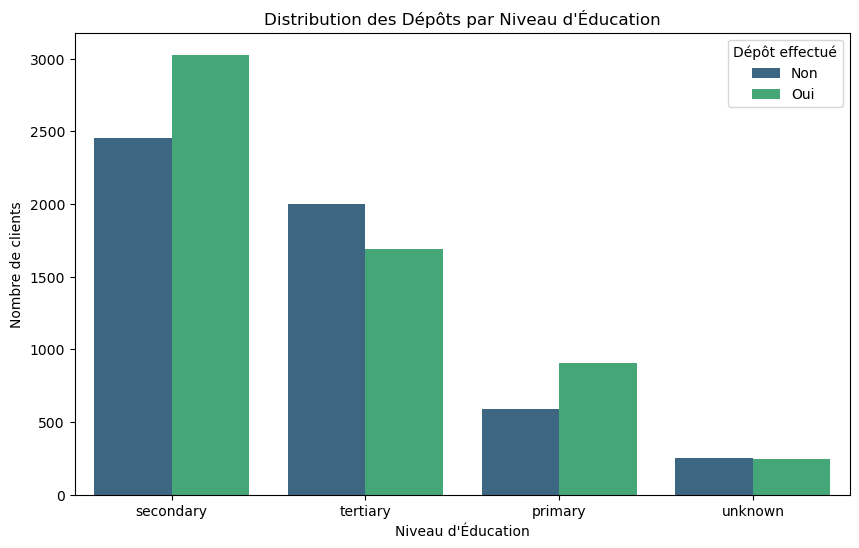

In [16]:
# Créer un graphique à barres empilées pour comparer la distribution des dépôts par niveau d'éducation
plt.figure(figsize=(10, 6))
sns.countplot(x='education', hue='deposit', data=df, palette='viridis')
plt.xlabel('Niveau d\'Éducation')
plt.ylabel('Nombre de clients')
plt.title('Distribution des Dépôts par Niveau d\'Éducation')
plt.legend(title='Dépôt effectué', labels=['Non', 'Oui'])
plt.show()

#### D'aprés l'histogramme précédent : 

##### Clients Ayant Effectué un Dépôt :
Niveau d'éducation primaire : 1000 clients
Niveau d'éducation secondaire : 3000 clients
Niveau d'éducation tertiaire : 1700 clients
Niveau d'éducation inconnu : 200 clients

##### Clients N'ayant Pas Effectué de Dépôt :
Niveau d'éducation primaire : 600 clients
Niveau d'éducation secondaire : 2400 clients
Niveau d'éducation tertiaire : 1900 clients
Niveau d'éducation inconnu : 250 clients 

#### Observations et Conclusions :
Le nombre absolu de clients ayant effectué un dépôt est généralement plus élevé chez ceux avec un niveau d'éducation secondaire, suivi par le niveau tertiaire. Cependant, le niveau d'éducation inconnu a le nombre le plus faible.

Le nombre absolu de clients n'ayant pas effectué de dépôt est également plus élevé chez ceux avec un niveau d'éducation secondaire, suivi par le niveau tertiaire. Le niveau d'éducation inconnu a également un nombre relativement bas.

Il semble y avoir une corrélation positive entre le niveau d'éducation (surtout secondaire et tertiaire) et le nombre absolu de clients ayant effectué un dépôt.

# Hypothèse 5: Les personnes ayant des emplois stables, tels que les professionnels, sont plus susceptibles de faire un dépôt en raison de leur stabilité financière.

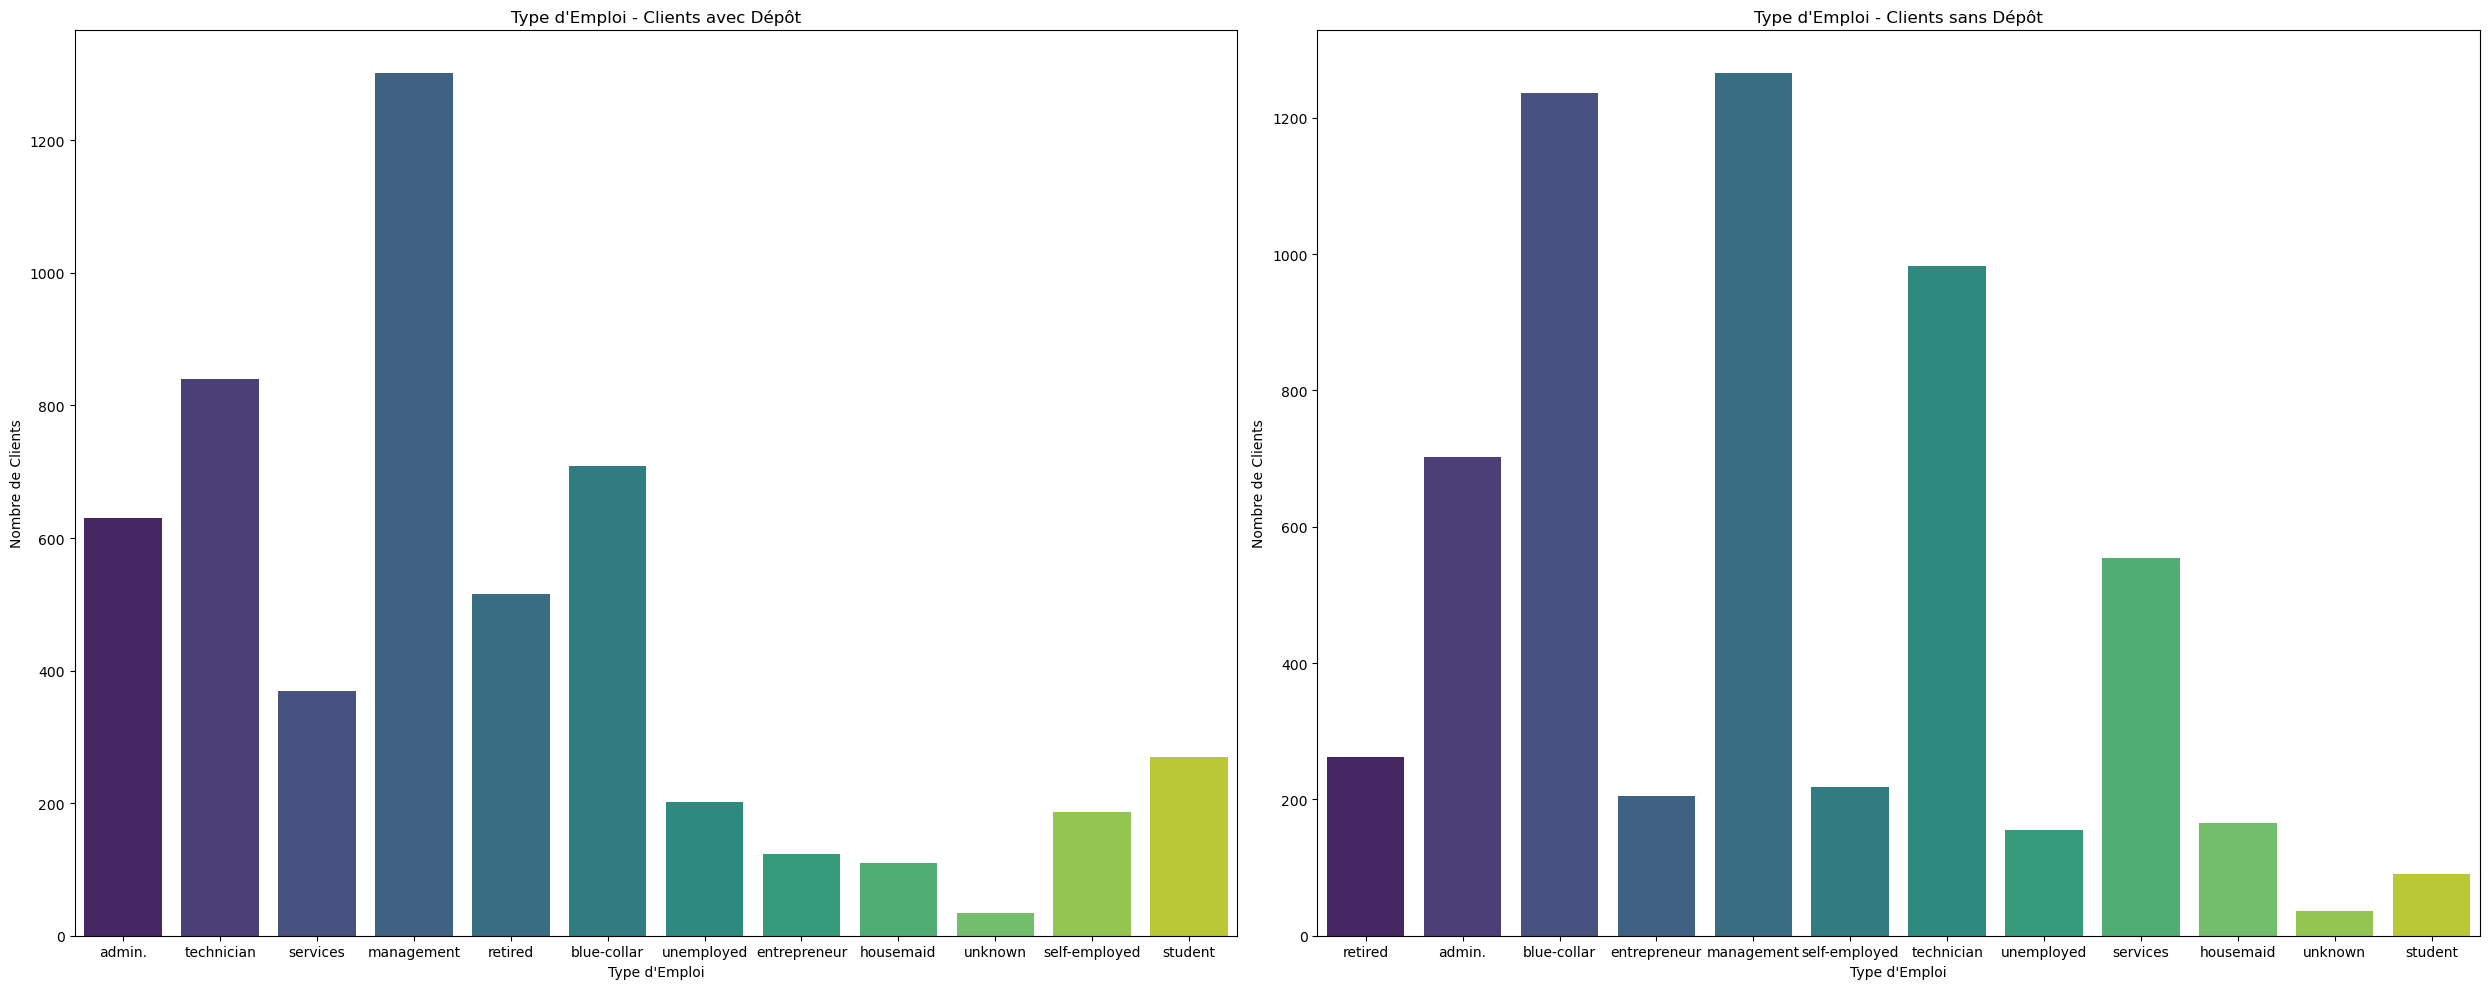

In [17]:
df_deposit = df[df['deposit'] == 'yes']
df_no_deposit = df[df['deposit'] == 'no']
# Créer une figure avec deux sous-graphiques
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25, 10))

# Histogramme pour les clients avec dépôt
sns.countplot(x='job', data=df_deposit, ax=axes[0], palette='viridis')
axes[0].set_title('Type d\'Emploi - Clients avec Dépôt')
axes[0].set_xlabel('Type d\'Emploi')
axes[0].set_ylabel('Nombre de Clients')

# Histogramme pour les clients sans dépôt
sns.countplot(x='job', data=df_no_deposit, ax=axes[1], palette='viridis')
axes[1].set_title('Type d\'Emploi - Clients sans Dépôt')
axes[1].set_xlabel('Type d\'Emploi')
axes[1].set_ylabel('Nombre de Clients')

# Ajuster la disposition
plt.tight_layout()
plt.show()

In [18]:
print("Données pour les clients avec dépôt:")
print(df_deposit['job'].value_counts().sort_index()) 
print("\nDonnées pour les clients sans dépôt:")
print(df_no_deposit['job'].value_counts().sort_index())


Données pour les clients avec dépôt:
admin.            631
blue-collar       708
entrepreneur      123
housemaid         109
management       1301
retired           516
self-employed     187
services          369
student           269
technician        840
unemployed        202
unknown            34
Name: job, dtype: int64

Données pour les clients sans dépôt:
admin.            703
blue-collar      1236
entrepreneur      205
housemaid         165
management       1265
retired           262
self-employed     218
services          554
student            91
technician        983
unemployed        155
unknown            36
Name: job, dtype: int64



#### En analysant les résultats des données pour les clients avec dépôt et sans dépôt en fonction du type d'emploi (job):
#####  Clients avec Dépôt :
Les catégories d'emploi les plus fréquentes parmi les clients ayant effectué un dépôt sont "management", "technician" et "admin.".
Les catégories moins fréquentes comprennent "student", "unemployed", "entrepreneur", et "self-employed".
##### Clients sans Dépôt :
Les catégories d'emploi les plus fréquentes parmi les clients n'ayant pas effectué de dépôt sont également "blue-collar", "admin.", "technician" et "services".
Les catégories moins fréquentes incluent "student", "unemployed", "entrepreneur" et "self-employed".   
##### Conclusion : Les données confirment partiellement l'hypothèse selon laquelle les personnes occupant des emplois stables, notamment dans la catégorie "management", sont plus enclines à effectuer un dépôt. Cependant, la diversité des catégories d'emploi parmi les clients avec dépôt suggère que la stabilité financière ne constitue pas le seul facteur influençant ce comportement. D'autres variables et analyses pourraient fournir des nuances supplémentaires sur les motifs de dépôt bancaire.

# Hypothèse 6 : Les personnes mariées sont plus enclines à effectuer un dépôt en raison de responsabilités financières familiales accrues. 

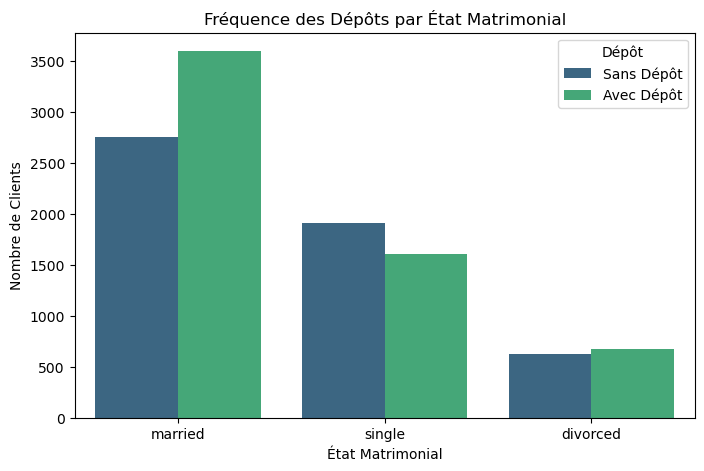

In [19]:

# Créer un graphique à barres pour comparer la fréquence des dépôts par état matrimonial
plt.figure(figsize=(8, 5))
sns_countplot = sns.countplot(x='marital', hue='deposit', data=df, palette='viridis')
plt.title('Fréquence des Dépôts par État Matrimonial')
plt.xlabel('État Matrimonial')
plt.ylabel('Nombre de Clients')
plt.legend(title='Dépôt', loc='upper right', labels=['Sans Dépôt', 'Avec Dépôt'])



In [20]:
# Imprimer les statistiques pour chaque catégorie d'état matrimonial
print("Statistiques des dépôts pour chaque état matrimonial:")
for bar, value in zip(sns_countplot.patches, df.groupby('marital')['deposit'].value_counts().sort_index()):
    print(f"{bar.get_x() + bar.get_width() / 2.0}: {value}")

plt.show()

Statistiques des dépôts pour chaque état matrimonial:
-0.2: 671
0.8: 622
1.8: 3596
0.2: 2755
1.2: 1606
2.2: 1912


In [21]:

# Calculer le nombre de clients par état matrimonial pour chaque classe
clients_with_deposit = df[df['deposit'] == 'yes']['marital'].value_counts()
clients_without_deposit = df[df['deposit'] == 'no']['marital'].value_counts()

# Imprimer les résultats
print("Nombre de clients avec dépôt par état matrimonial:")
print(clients_with_deposit)
print("\nNombre de clients sans dépôt par état matrimonial:")
print(clients_without_deposit)

Nombre de clients avec dépôt par état matrimonial:
married     2755
single      1912
divorced     622
Name: marital, dtype: int64

Nombre de clients sans dépôt par état matrimonial:
married     3596
single      1606
divorced     671
Name: marital, dtype: int64


### Comparons les résultats obtenus avec notre hypothèse :

#### Avec Dépôt :
Mariés : 2,755 clients
Célibataires : 1,912 clients
Divorcés : 622 clients

#### Sans Dépôt :
Mariés : 3,596 clients
Célibataires : 1,606 clients
Divorcés : 671 clients

### Analyse :
Les personnes mariées ont effectivement un nombre plus élevé de clients avec et sans dépôt, ce qui pourrait être cohérent avec l'idée de responsabilités financières familiales accrues.

Cependant, le groupe de célibataires a un nombre significatif de clients avec dépôt, ce qui suggère que l'état matrimonial seul ne peut pas expliquer complètement le comportement de dépôt.

### Conclusion :
Les résultats semblent partiellement cohérents avec l'hypothèse. Les personnes mariées ont effectivement une présence plus importante dans les deux classes, mais d'autres facteurs peuvent également influencer le comportement de dépôt. L'état matrimonial n'est qu'un aspect du puzzle, et d'autres caractéristiques individuelles pourraient jouer un rôle important dans la prise de décision financière.








#  Hypothèse 7 : Les personnes ayant répondu positivement à la campagne marketing précédente sont plus susceptibles de faire un dépôt lors de la campagne actuelle.

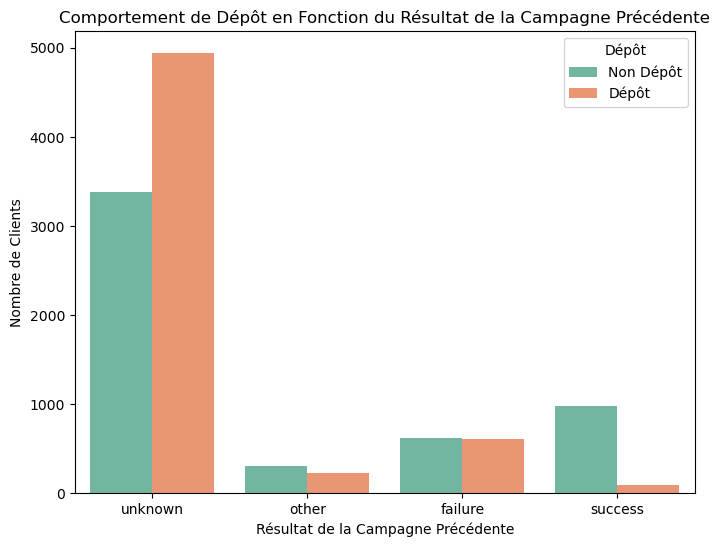

In [22]:
# Créer un histogramme comparant le comportement de dépôt
plt.figure(figsize=(8, 6))
sns.countplot(x='poutcome', hue='deposit', data=df, palette='Set2')
plt.title('Comportement de Dépôt en Fonction du Résultat de la Campagne Précédente')
plt.xlabel('Résultat de la Campagne Précédente')
plt.ylabel('Nombre de Clients')
plt.legend(title='Dépôt', loc='upper right', labels=['Non Dépôt', 'Dépôt'])
plt.show()

In [23]:
# Obtenir le décompte de chaque catégorie
count_by_poutcome_deposit = df.groupby(['poutcome', 'deposit']).size().reset_index(name='count')

# Afficher les statistiques
print("Statistiques de l'histogramme en fonction du résultat de la campagne précédente:")
print(count_by_poutcome_deposit)


Statistiques de l'histogramme en fonction du résultat de la campagne précédente:
  poutcome deposit  count
0  failure      no    610
1  failure     yes    618
2    other      no    230
3    other     yes    307
4  success      no     93
5  success     yes    978
6  unknown      no   4940
7  unknown     yes   3386


## Analyse de l'histogramme  
### Échec (Failure) :
Non Dépôt (No): 610 

Dépôt (Yes): 618
### Autre (Other) :
Non Dépôt (No): 230 

Dépôt (Yes): 307
### Succès (Success) :
Non Dépôt (No): 93 

Dépôt (Yes): 978
### Inconnu (Unknown) :
Non Dépôt (No): 4940 

Dépôt (Yes): 3386  
## Conclusion
Ces résultats suggèrent que les personnes dont la campagne précédente a abouti à un succès sont beaucoup plus susceptibles de faire un dépôt lors de la campagne actuelle

# Hypothèse 8 : Les clients contactés par téléphone cellulaire sont plus enclins à faire des dépôts que ceux contactés par d'autres moyens.

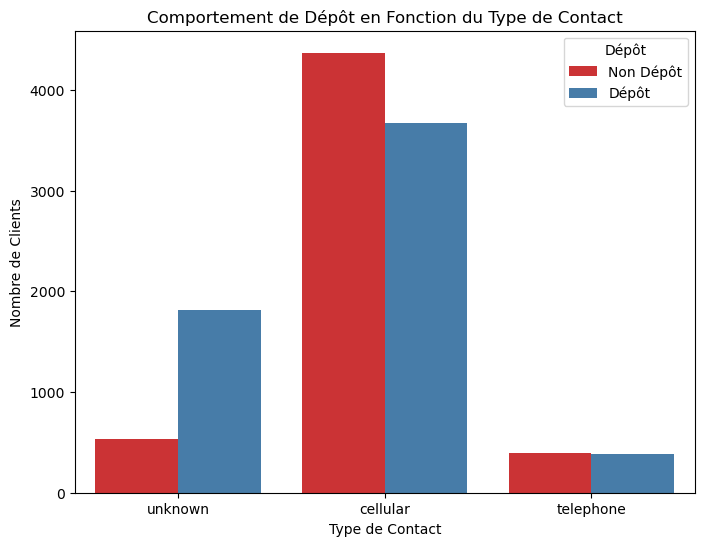

In [24]:
# Créer un histogramme comparant le taux de dépôt en fonction du type de contact
plt.figure(figsize=(8, 6))
sns.countplot(x='contact', hue='deposit', data=df, palette='Set1')
plt.title('Comportement de Dépôt en Fonction du Type de Contact')
plt.xlabel('Type de Contact')
plt.ylabel('Nombre de Clients')
plt.legend(title='Dépôt', loc='upper right', labels=['Non Dépôt', 'Dépôt'])
plt.show()

In [25]:
# Obtenir le décompte de chaque catégorie
count_by_poutcome_deposit = df.groupby(['contact', 'deposit']).size().reset_index(name='count')

# Afficher les statistiques
print("Statistiques de l'histogramme en fonction du résultat de la campagne précédente:")
print(count_by_poutcome_deposit)

Statistiques de l'histogramme en fonction du résultat de la campagne précédente:
     contact deposit  count
0   cellular      no   3673
1   cellular     yes   4369
2  telephone      no    384
3  telephone     yes    390
4    unknown      no   1816
5    unknown     yes    530


## Analyse de l'histogramme : 

### Cellulaire :
Dépôts (Yes) : 4369 clients

Non-dépôts (No) : 3673 clients

### Téléphone :
Dépôts (Yes) : 390 clients

Non-dépôts (No) : 384 clients 

### Inconnu :
Dépôts (Yes) : 530 clients 

Non-dépôts (No) : 1816 clients  

## Conclusions :

Les clients contactés par téléphone cellulaire ont un nombre plus élevé de dépôts (4369) par rapport aux clients contactés par

téléphone (390) et ceux dont le mode de contact est inconnu (530).

Les clients contactés par téléphone semblent avoir un taux de dépôt plus faible par rapport aux clients contactés par téléphone

cellulaire.

Les clients avec un mode de contact inconnu ont un nombre relativement bas de dépôts par rapport aux deux autres types de 

contact.

# Hypothèse 9 " le mois de contact ":Les campagnes menées à certains mois de l'année peuvent avoir un impact sur le taux de dépôt. 

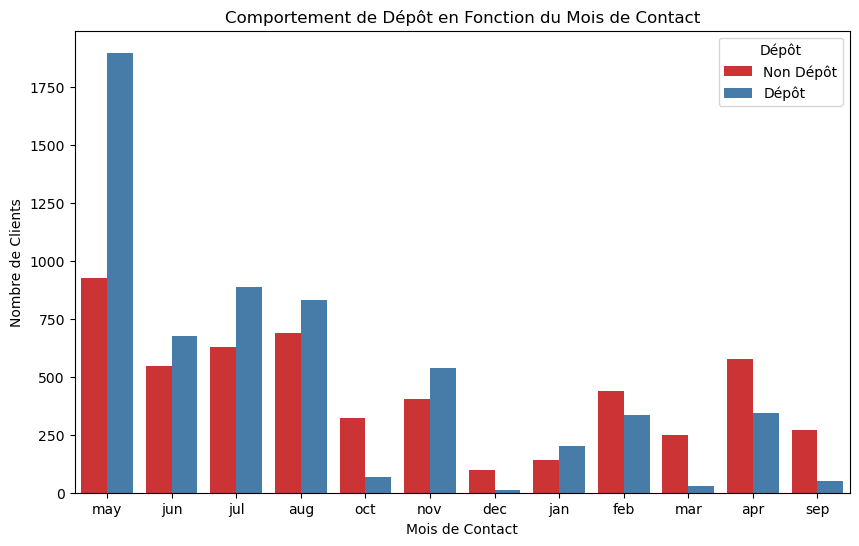

       count    mean         std    min      25%     50%      75%     max
month                                                                    
apr      2.0   461.5  163.341666  346.0   403.75   461.5   519.25   577.0
aug      2.0   759.5  101.116270  688.0   723.75   759.5   795.25   831.0
dec      2.0    55.0   63.639610   10.0    32.50    55.0    77.50   100.0
feb      2.0   388.0   74.953319  335.0   361.50   388.0   414.50   441.0
jan      2.0   172.0   42.426407  142.0   157.00   172.0   187.00   202.0
jul      2.0   757.0  183.847763  627.0   692.00   757.0   822.00   887.0
jun      2.0   611.0   91.923882  546.0   578.50   611.0   643.50   676.0
mar      2.0   138.0  155.563492   28.0    83.00   138.0   193.00   248.0
may      2.0  1412.0  688.722005  925.0  1168.50  1412.0  1655.50  1899.0
nov      2.0   471.5   96.873629  403.0   437.25   471.5   505.75   540.0
oct      2.0   196.0  179.605122   69.0   132.50   196.0   259.50   323.0
sep      2.0   159.5  154.856385   50.

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supposons que votre DataFrame s'appelle df
# Créer un histogramme comparant le taux de dépôt en fonction du mois de contact
plt.figure(figsize=(10, 6))
sns.countplot(x='month', hue='deposit', data=df, palette='Set1')
plt.title('Comportement de Dépôt en Fonction du Mois de Contact')
plt.xlabel('Mois de Contact')
plt.ylabel('Nombre de Clients')
plt.legend(title='Dépôt', loc='upper right', labels=['Non Dépôt', 'Dépôt'])
plt.show()

# Ajouter une colonne 'count' au DataFrame
df_count = df.groupby(['month', 'deposit']).size().unstack(fill_value=0).stack().reset_index(name='count')

# Générer la description statistique
description_mois = df_count.groupby('month')['count'].describe()
print(description_mois)


## Analyse de l'hypothèse sur le mois de contact :


Avril (apr) : La moyenne de dépôts est d'environ 461.5, avec une variation relativement faible entre le 25e et le 75e 

percentile. Cela suggère une stabilité dans le nombre de dépôts au cours de ce mois.

Août (aug) : La moyenne de dépôts est plus élevée, atteignant environ 759.5. La variation entre le 25e et le 75e percentile est 

relativement faible, indiquant une constance dans les performances au cours de ce mois.

Décembre (dec) : Le mois de décembre a une moyenne de seulement 55 dépôts, mais la variation est significative (de 32.50 à 77.50 

entre le 25e et le 75e percentile). Cela suggère une plus grande incertitude ou variabilité dans le nombre de dépôts pendant ce mois.

Mai (may) : Mai se distingue avec une moyenne élevée d'environ 1412 dépôts. La variation entre le 25e et le 75e percentile est 

importante, soulignant la diversité des performances au cours de ce mois.  

## Conclusion 


Les mois d'avril et d'août semblent relativement stables en termes de performances de dépôt, avec des variations moins importantes.

Décembre présente une variabilité plus élevée, indiquant des performances moins prévisibles pendant cette période.

Mai se démarque comme un mois avec des performances exceptionnelles, avec une moyenne significativement plus élevée.

# Conclusion générale
En analysant les neuf hypothèses formulées à partir du jeu de données sur le marketing bancaire, nous pouvons tirer quelques 

conclusions générales :

### Âge et Dépôt : 
Les personnes plus jeunes semblent effectivement plus enclines à faire un dépôt, avec une  moyenne d'âge d'environ 41.67 ans pour ceux qui ont effectué un dépôt.

### Solde du Compte et Dépôt :  
La moyenne du solde du compte est plus élevée pour les personnes ayant effectué un dépôt, suggérant que celles avec une capacité financière plus importante sont plus enclines à faire un dépôt.

### Durée du Dernier Contact et Dépôt : 
La durée moyenne du dernier contact est plus élevée pour les personnes  ayant effectué un dépôt, indiquant un intérêt plus prononcé et une interaction plus engagée.

### Éducation et Dépôt : 
Il existe une corrélation positive entre le niveau d'éducation (surtout secondaire et tertiaire) et le nombre absolu de clients ayant effectué un dépôt.

### Emploi et Dépôt : 
Les personnes occupant des emplois stables, en particulier dans les catégories "management" et "technician", sont plus enclines à effectuer un dépôt.

### État Matrimonial et Dépôt : 
Les personnes mariées ont une présence plus importante dans les deux classes (avec et sans dépôt), mais d'autres facteurs peuvent influencer le comportement de dépôt.

### Campagne Marketing Précédente et Dépôt : 
Les personnes dont la campagne précédente a abouti à un succès sont beaucoup plus susceptibles de faire un dépôt lors de la campagne actuelle.

### Type de Contact et Dépôt : 
Les clients contactés par téléphone cellulaire ont un nombre plus élevé de dépôts par rapport aux clients contactés par téléphone, et ceux dont le mode de contact est inconnu ont un taux de dépôt relativement bas.

### Mois de Contact et Dépôt :
Certains mois, comme mai, présentent des performances exceptionnelles avec une moyenne significativement plus élevée de dépôts, tandis que d'autres, comme décembre, montrent une variabilité plus élevée.

### En conclusion, plusieurs facteurs semblent influencer la décision des clients de faire un dépôt, et une approche plus holistique prenant en compte diverses caractéristiques individuelles peut fournir une meilleure compréhension du comportement de dépôt bancaire.